<a href="https://colab.research.google.com/github/maseerab/predictive/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded — Shape: (4269, 13)
Unique values in 'loan_status' after stripping whitespace: ['Approved' 'Rejected']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical columns: ['education', 'self_employed']

📊 Model Evaluation:
Accuracy Score: 0.905

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Confusion Matrix:
 [[275  43]
 [ 38 498]]


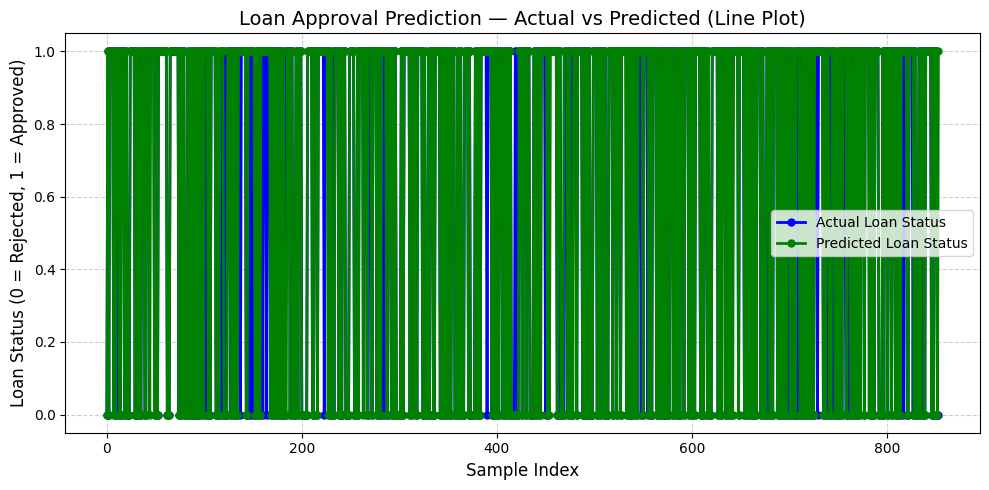

In [ ]:
# 1. Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")
print("✅ Dataset Loaded — Shape:", df.shape)

# Drop ID column
df.drop(columns=['loan_id'], inplace=True)

# Rename columns (strip leading/trailing spaces)
df.columns = df.columns.str.strip()

# 2. Prepare Features and Target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Strip whitespace from 'loan_status' before mapping
y = y.str.strip()

# Print unique values in 'loan_status' before mapping
print("Unique values in 'loan_status' after stripping whitespace:", y.unique())

# Convert target labels to binary (Approved=1, Rejected=0)
y = y.map({"Approved": 1, "Rejected": 0})

# Identify column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# 3. Preprocessing Pipeline + Train-Test Split
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and Train Logistic Regression Model
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# 5. Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
print("\n📊 Model Evaluation:")
print(f"Accuracy Score: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 5))

# Plot actual loan status
plt.plot(range(len(y_test)), y_test.values, 'bo-', label='Actual Loan Status', markersize=5, linewidth=2)

# Plot predicted loan status
plt.plot(range(len(y_pred)), y_pred, 'go-', label='Predicted Loan Status', markersize=5, linewidth=2)

# Title and labels
plt.title("Loan Approval Prediction — Actual vs Predicted (Line Plot)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Loan Status (0 = Rejected, 1 = Approved)", fontsize=12)

# Styling
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



📊 Accuracy: 0.823

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



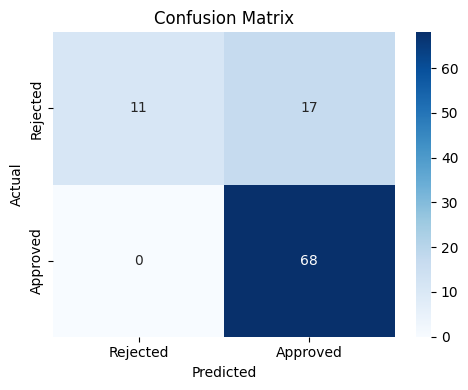

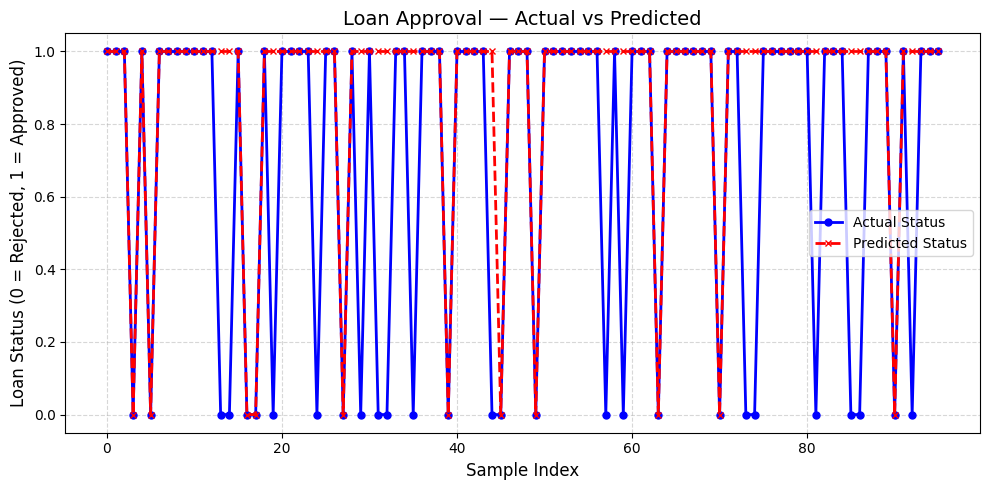

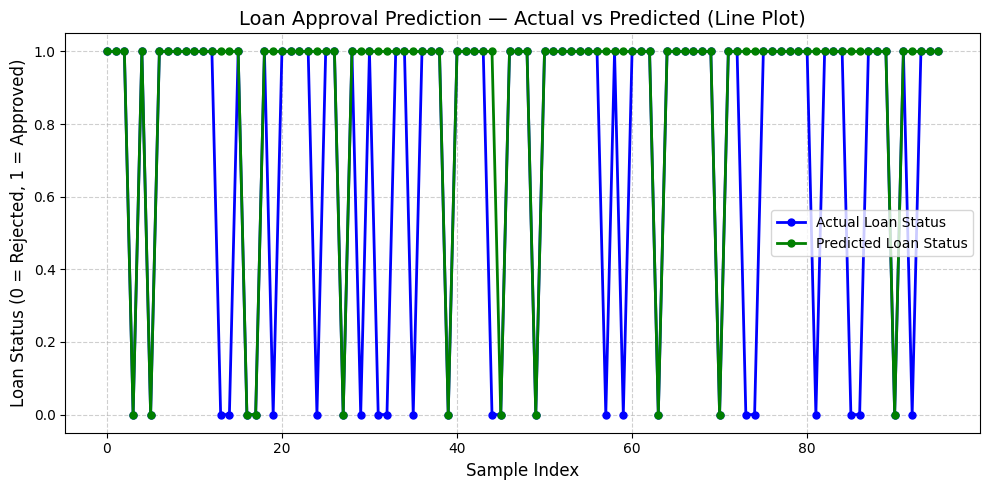

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load and clean dataset
df = pd.read_csv("loan_prediction.csv")
df.drop(columns=["Loan_ID"], inplace=True)  # Drop ID column

# Strip column names of whitespace just in case
df.columns = df.columns.str.strip()

# Drop rows with missing values
df.dropna(inplace=True)

# 3. Separate Features & Target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"].map({"Y": 1, "N": 0})  # Convert to binary

# 4. Identify column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

# 5. Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_cols)
])

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build and Train Model
model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 9. 📈 Actual vs Predicted Visualization (Your preferred style)
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test.values, 'bo-', label='Actual Status', markersize=5, linewidth=2)
plt.plot(range(len(y_pred)), y_pred, 'rx--', label='Predicted Status', markersize=5, linewidth=2)
plt.title("Loan Approval — Actual vs Predicted", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Loan Status (0 = Rejected, 1 = Approved)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))

# Plot actual loan status
plt.plot(range(len(y_test)), y_test.values, 'bo-', label='Actual Loan Status', markersize=5, linewidth=2)

# Plot predicted loan status
plt.plot(range(len(y_pred)), y_pred, 'go-', label='Predicted Loan Status', markersize=5, linewidth=2)

# Title and labels
plt.title("Loan Approval Prediction — Actual vs Predicted (Line Plot)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Loan Status (0 = Rejected, 1 = Approved)", fontsize=12)

# Styling
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

